> Kernel-SVM Implementation

> This assignment's goal is to implement and explore classification and dimensionality reduction methods
to develop and evaluate the performance of expression recognition tasks.

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from keras_preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.models import Model, Sequential
from livelossplot import PlotLossesKerasTF
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
import os
warnings.filterwarnings('ignore') 

In [2]:
#i.e Sample Facial expression dataset 
data = {
    "Fear": [420, 380, 390],
    "Angry": [43, 38430, 7364],
    "Happy": [13, 31, 900],
    "Neutral": [1437, 867, 987],
    "Sad": [42340, 134, 687],
    "Suprise": [2436, 134324, 14341]
}

df = pd.DataFrame(data)

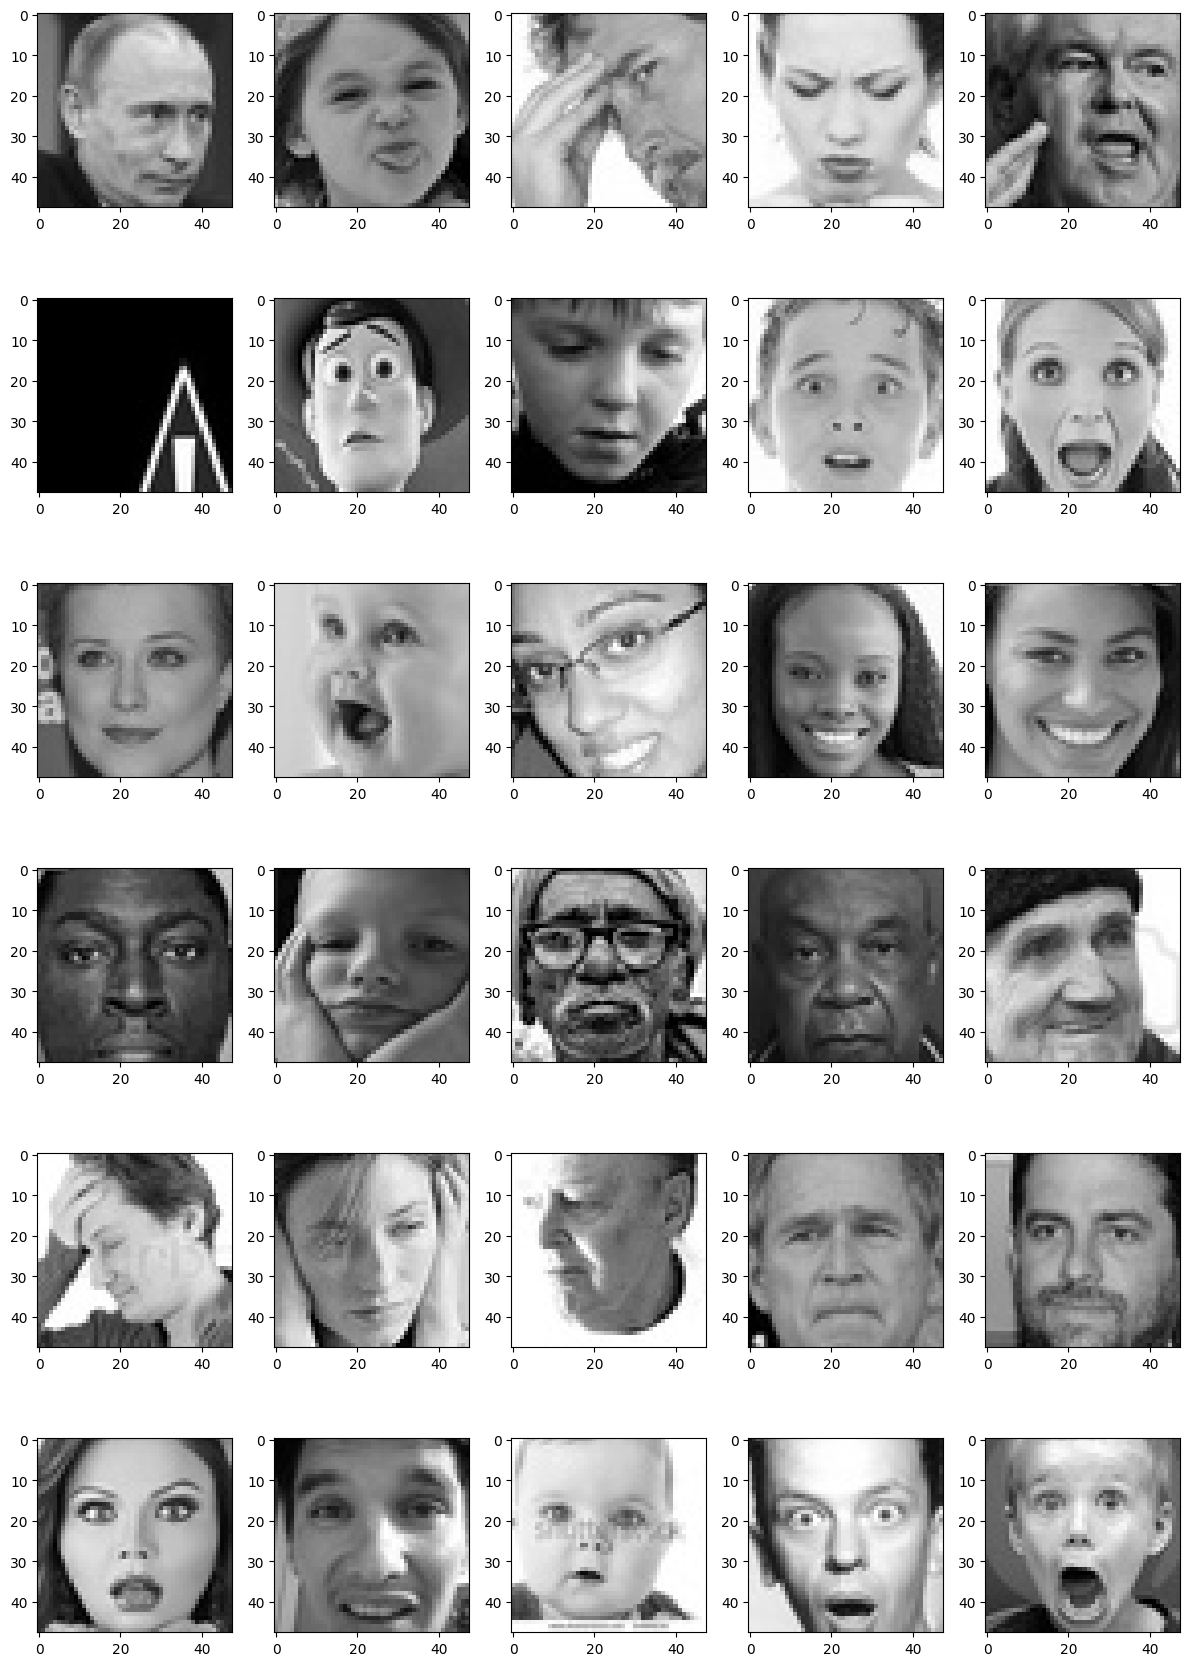

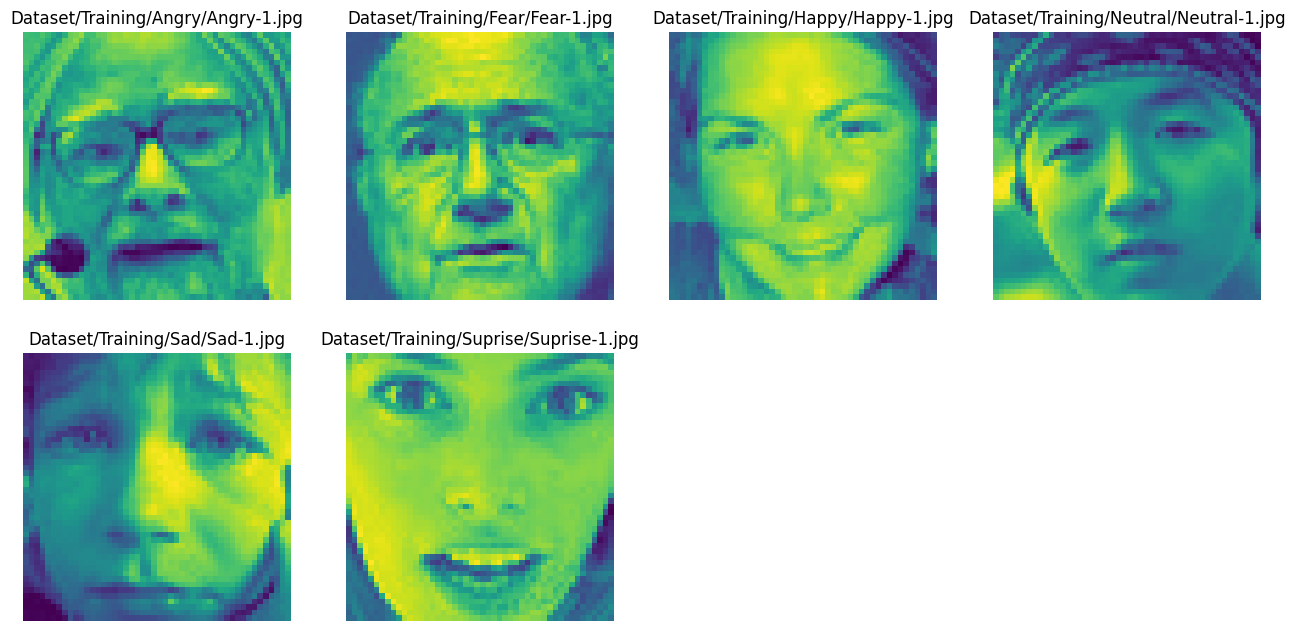

In [3]:
# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = "Dataset/Training/"

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + expression + "/" +os.listdir(base_path + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import os
nrows = 4
ncols = 4

pic_index = 0
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=4

next_pix = [os.path.join(base_path + expression+'/'+ os.listdir(base_path + expression)[0]) for expression in os.listdir(base_path)]

for i, img_path in enumerate(next_pix):
  # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.title(img_path)

plt.show()

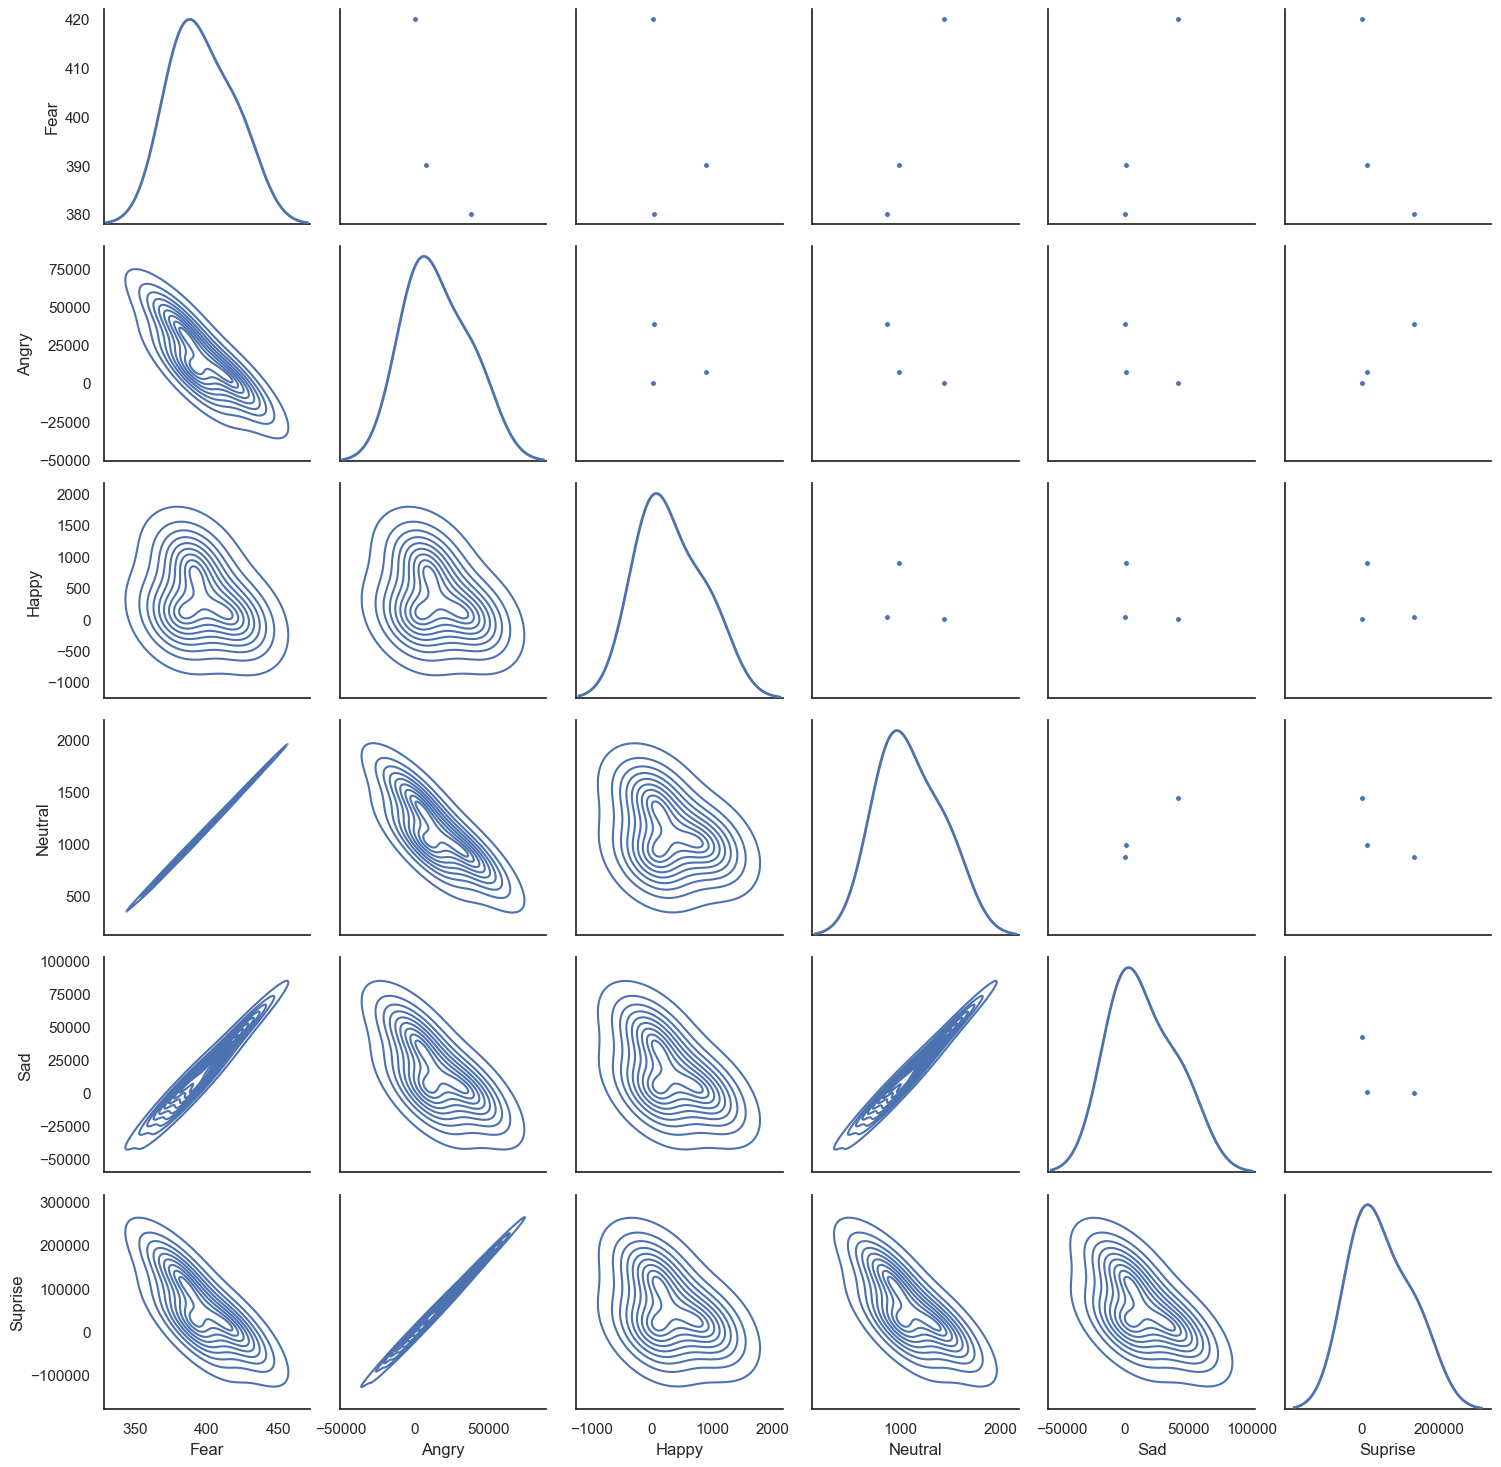

In [4]:
sns.set_theme(style="white")

g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

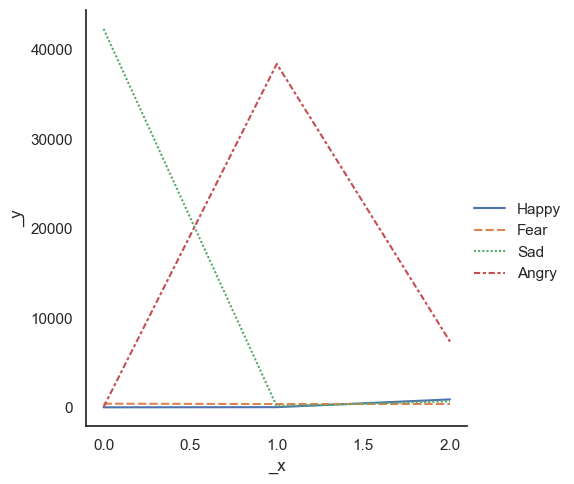

<Figure size 1500x800 with 0 Axes>

In [5]:
sns.relplot(data=df[['Happy', 'Fear', 'Sad', 'Angry']], kind='line')
plt.figure(figsize=(15,8))
plt.show()

In [6]:
# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(base_path,
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(base_path,
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28273 images belonging to 6 classes.
Found 28273 images belonging to 6 classes.


In [8]:
img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True)
#ImageDataGenerator accepts the original data, randomly transforms it, and returns only the new, transformed data
#Translations, Rotations, Changes in scale, Shearing, Horizontal (and in some cases, vertical) flips

train_generator = datagen_train.flow_from_directory(base_path,
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory(base_path,
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28273 images belonging to 6 classes.
Found 28273 images belonging to 6 classes.
